# Name: Molchanov Semen

# ID: 20B030231

# Data set description

Data contains recordings of five people performing different activities. Each person wore four sensors (tags) while performing the same scenario five times.

People used for recording of the data were wearing four tags (ankle left, ankle right, belt and chest).
Each instance is a localization data for one of the tags. The tag can be identified by one of the attributes.

More info about the data set can be found in file *dataset_description.txt* or by the following link:

http://archive.ics.uci.edu/ml/datasets/Localization+Data+for+Person+Activity

## Aim of the work

*To determine the activity (reconstruct the posture)* of the person basing on the data form the data set

### Libraries

Importing instruments to work with:
+ numeric data (numpy)
+ table data (pandas)
+ graph plotting (matplotlib)
+ visualization (seaborn)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Inline

So **matplotlib** can be used properly in *Jupyter Notebook*

In [2]:
%matplotlib inline

In [3]:
# change the cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Reading data

Reading table data from the *.csv* file

In [4]:
df = pd.read_csv('data.csv')

### Checking the table

Checking the first 5 rows of the table to ensure that it was read correctly

In [5]:
df.head()

,A01,010-000-024-033,633790226051280329,27.05.2009 14:03:25:127,4.062931060791016,1.8924342393875122,0.5074254274368286,walking
0,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking
1,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking
2,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking
3,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking
4,A01,020-000-033-111,633790226052902087,27.05.2009 14:03:25:290,4.364077,1.767691,1.299996,walking


### Assigning column names

Looks like there are no column names in the read table. Names to be assigned according to the dataset description in the *dataset_description.txt* file

In [6]:
df.columns = ['sequence name', 'tag ID', 'timestamp', 'date time', 
                'tag x coordinate', 'tag y coordinate', 'tag z coordinate', 'activity']

In [7]:
df.head()

,sequence name,tag ID,timestamp,date time,tag x coordinate,tag y coordinate,tag z coordinate,activity
0,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking
1,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking
2,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking
3,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking
4,A01,020-000-033-111,633790226052902087,27.05.2009 14:03:25:290,4.364077,1.767691,1.299996,walking


Now columns are named correctly

### Table content

Checking table content for presence of missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164859 entries, 0 to 164858
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sequence name     164859 non-null  object 
 1   tag ID            164859 non-null  object 
 2   timestamp         164859 non-null  int64  
 3   date time         164859 non-null  object 
 4   tag x coordinate  164859 non-null  float64
 5   tag y coordinate  164859 non-null  float64
 6   tag z coordinate  164859 non-null  float64
 7   activity          164859 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 10.1+ MB


### Description

Basic statistical analysis of each attribute (column)

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sequence name,164859,25,E03,9112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tag ID,164859,4,010-000-024-033,43525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,164859.0,NaN,NaN,NaN,633790197048715904.0,55181509430.072716,633790118990010880.0,633790145609749120.0,633790203190701312.0,633790237908618880.0,633790291874801792.0
date time,164859,164833,27.05.2009 12:09:03:780,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tag x coordinate,164859.0,NaN,NaN,NaN,2.81134,0.916224,-0.278698,2.15576,2.880421,3.414092,5.758173
tag y coordinate,164859.0,NaN,NaN,NaN,1.696876,0.47377,-0.494428,1.3505,1.634168,2.039324,3.978097
tag z coordinate,164859.0,NaN,NaN,NaN,0.41821,0.379126,-2.543609,0.171623,0.366284,0.613118,2.606105
activity,164859,11,lying,54480,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Categorical values 

Counting unique values of categorical variables

In [10]:
categorical_values = df.select_dtypes(include='object').columns.to_list()
categorical_values.remove("date time") 
for i in categorical_values:
    print("name of column - {}".format(i))
    print("number of unique values -", df[i].nunique())
    print("unique values -", df[i].unique()) 
    print('*'*30)
    print()

name of column - sequence name
number of unique values - 25
unique values - ['A01' 'A02' 'A03' 'A04' 'A05' 'B01' 'B02' 'B03' 'B04' 'B05' 'C01' 'C02'
 'C03' 'C04' 'C05' 'D01' 'D02' 'D03' 'D04' 'D05' 'E01' 'E02' 'E03' 'E04'
 'E05']
******************************

name of column - tag ID
number of unique values - 4
unique values - ['020-000-033-111' '020-000-032-221' '010-000-024-033' '010-000-030-096']
******************************

name of column - activity
number of unique values - 11
unique values - ['walking' 'sitting down' 'sitting' 'standing up from sitting' 'falling'
 'lying' 'standing up from lying' 'lying down' 'sitting on the ground'
 'standing up from sitting on the ground' 'on all fours']
******************************



According to the calculations there are: 

+ 4 unique tags - chest (020-000-033-111), belt (020-000-032-221), right (010-000-030-096) and left (010-000-024-033) ankle;
+ 11 activities - walking, falling, lying down, lying, sitting down, sitting, standing up from lying, on all fours, sitting on the ground, standing up from sitting, standing up from sitting on the ground;
+ 25 sequence names - 5 five scenarios for each of the 5 people: A, B, C, D and E;

which corresponds to the *dataset_description.txt*

### Boxplots

Now to visualize ***how well*** data is distributed we plot *boxplots* for each numeric value: 

+ timestamp
+ tag x coordinate
+ tag y coordinate
+ tag z coordinate

C:\Users\semam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


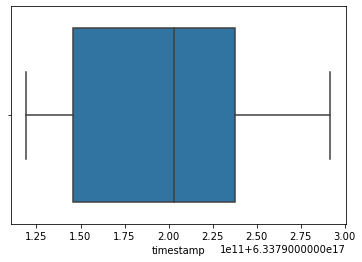

C:\Users\semam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


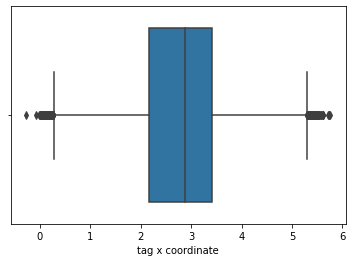

C:\Users\semam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


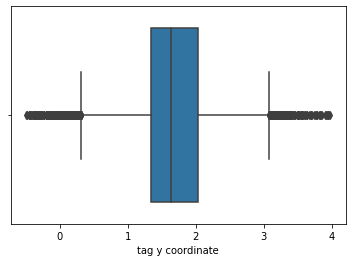

C:\Users\semam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


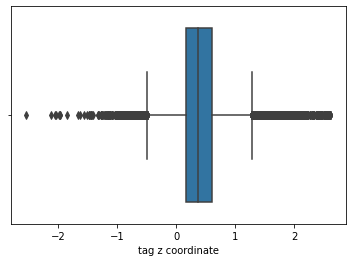

In [11]:
for i in df.select_dtypes(include=['int64', 'float64']):
    sns.boxplot(df[i]) 
    plt.show()

Obtained graphs show that tags' coordinates distributied so that they have many outliers. Especially 'z' coordinate

### Distribution plots

Now to visualize ***how*** data is distributed we plot *distribution plots* for each numeric value: 

+ timestamp
+ tag x coordinate
+ tag y coordinate
+ tag z coordinate

C:\Users\semam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


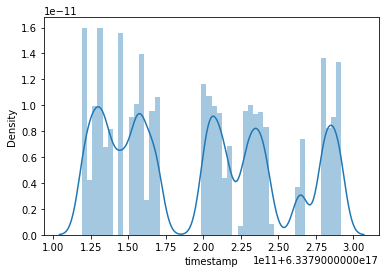

C:\Users\semam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


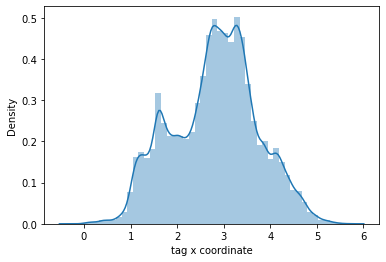

C:\Users\semam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


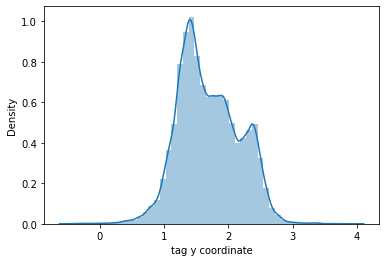

C:\Users\semam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


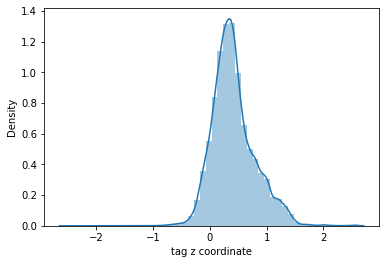

In [12]:
for i in df.select_dtypes(include=['int64', 'float64']):
    sns.distplot(df[i]) # Distribution plot to check how data is distributed
    plt.show()

Obtained graphs show that tags' coordinates distributed so that they follow the normal distribution law, because on the graph they are plotted as Gaussian bell curve

### Encoding categorical values

For forthcoming analysis of correlations and in order to successfully build classification models all categorical values should be properly encoded to numeric.

Target class values are encoded in alphabetical order


In [13]:
def categorical_to_numeric(df):

    from sklearn.preprocessing import LabelEncoder

    sequencename_encoder =  LabelEncoder()
    tagID_encoder = LabelEncoder()
    activity_encoder = LabelEncoder()

    df['sequence name'] = sequencename_encoder.fit_transform(df['sequence name'])
    df['tag ID'] = tagID_encoder.fit_transform(df['tag ID'])
    df['activity'] = activity_encoder.fit_transform(df['activity'])
    
    return "categorical values encoded successfully"

### Feature Engineering

Splitting the *date time* column to pieces so there wil be year, month, day, hour, minute, second and millisecond

In [14]:
def split_datetime_column(df):
    from datetime import datetime as dt 
    
    df['date time'] = pd.to_datetime(df['date time'], format="%d.%m.%Y %H:%M:%S:%f")
    
    df['year'] = df['date time'].dt.year
    df['month'] = df['date time'].dt.month
    df['day'] = df['date time'].dt.day
    df['hour'] = df['date time'].dt.hour
    df['minute'] = df['date time'].dt.minute
    df['second'] = df['date time'].dt.second
    df['millisecond'] = df['date time'].dt.microsecond
    
    del df['date time'] 
    
    return 'column date time splitted successfully'

In [15]:
categorical_to_numeric(df)

'categorical values encoded successfully'

Table with encoded categorical values looks as follows:

In [16]:
df.head()

,sequence name,tag ID,timestamp,date time,tag x coordinate,tag y coordinate,tag z coordinate,activity
0,0,3,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,10
1,0,2,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,10
2,0,0,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,10
3,0,1,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,10
4,0,3,633790226052902087,27.05.2009 14:03:25:290,4.364077,1.767691,1.299996,10


In [17]:
split_datetime_column(df)

'column date time splitted successfully'

This is how DataFrame with splitted datetime looks.

In [18]:
df.head()

,sequence name,tag ID,timestamp,tag x coordinate,tag y coordinate,tag z coordinate,activity,year,month,day,hour,minute,second,millisecond
0,0,3,633790226051820913,4.291954,1.781140,1.344495,10,2009,5,27,14,3,25,183000
1,0,2,633790226052091205,4.359101,1.826456,0.968821,10,2009,5,27,14,3,25,210000
2,0,0,633790226052361498,4.087835,1.879999,0.466983,10,2009,5,27,14,3,25,237000
3,0,1,633790226052631792,4.324462,2.072460,0.488065,10,2009,5,27,14,3,25,263000
4,0,3,633790226052902087,4.364077,1.767691,1.299996,10,2009,5,27,14,3,25,290000


### Finding correlations

Use heatmap to find correlations between atributes

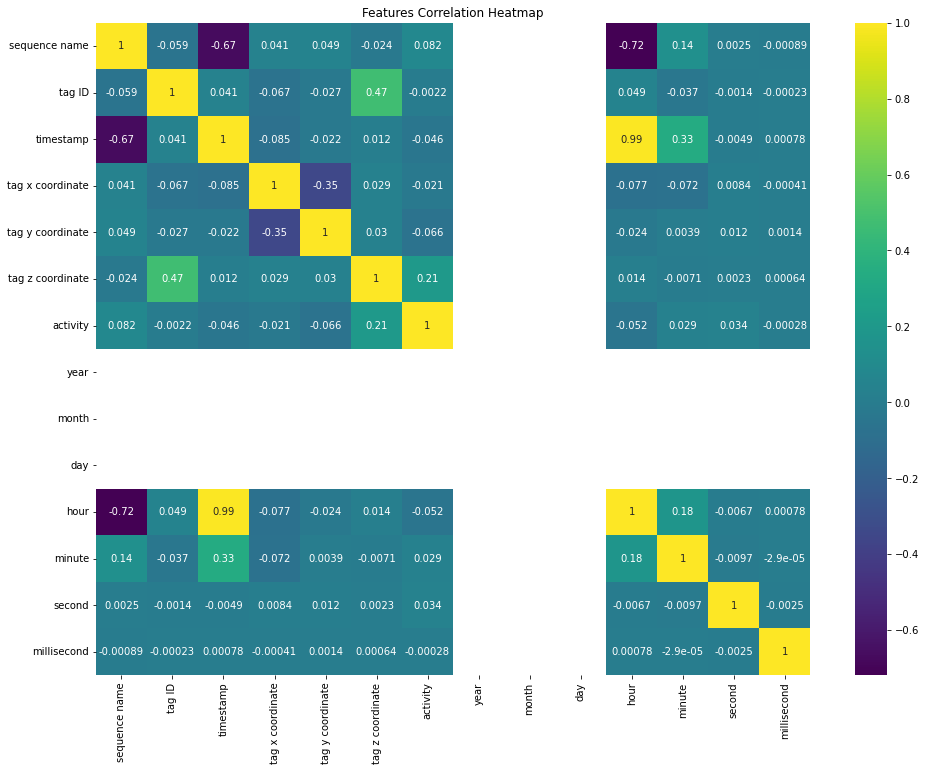

In [19]:
corr = df.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Features Correlation Heatmap")
plt.show()

It is seen from the heatmap that varibles year, month and day are not correlated with each other. It is also seen from the following table.

In [20]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
sequence name,164859.0,1.299945e+01,7.326742e+00,0.000000e+00,7.000000e+00,1.300000e+01,2.000000e+01,2.400000e+01
tag ID,164859.0,1.430974e+00,1.098905e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
timestamp,164859.0,6.337902e+17,5.518151e+10,6.337901e+17,6.337901e+17,6.337902e+17,6.337902e+17,6.337903e+17
tag x coordinate,164859.0,2.811340e+00,9.162241e-01,-2.786983e-01,2.155760e+00,2.880421e+00,3.414092e+00,5.758173e+00
tag y coordinate,164859.0,1.696876e+00,4.737703e-01,-4.944278e-01,1.350500e+00,1.634168e+00,2.039324e+00,3.978097e+00
tag z coordinate,164859.0,4.182099e-01,3.791256e-01,-2.543609e+00,1.716229e-01,3.662842e-01,6.131181e-01,2.606105e+00
activity,164859.0,4.627730e+00,3.472324e+00,0.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01
year,164859.0,2.009000e+03,0.000000e+00,2.009000e+03,2.009000e+03,2.009000e+03,2.009000e+03,2.009000e+03
month,164859.0,5.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
day,164859.0,2.700000e+01,0.000000e+00,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01


### Inspecting the date and time columns

In [21]:
datetime_columns = ['day', 'month', 'year', 'hour', 'minute', 'second', 'millisecond']

for i in datetime_columns:
    print("name of column - {}".format(i))
    print("number of unique values -", df[i].nunique())
    print("unique values -", df[i].unique()) 
    print('*'*30)
    print()

name of column - day
number of unique values - 1
unique values - [27]
******************************

name of column - month
number of unique values - 1
unique values - [5]
******************************

name of column - year
number of unique values - 1
unique values - [2009]
******************************

name of column - hour
number of unique values - 5
unique values - [14 13 15 11 12]
******************************

name of column - minute
number of unique values - 52
unique values - [ 3  4  5  6 10 11 12 13 17 18 19 20 22 23 24 25 29 30 31 32 21 26 27 28
 33 34 37 38 39 40 45 46 47 48  7  8  9 35 36 44 49 50 51 52 53 59  0  1
  2 14 15 16]
******************************

name of column - second
number of unique values - 60
unique values - [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17 18 19 20 21 22 23 24]
******************************

name of column - millisecond


Inspection shows that all the measurements were made in the same day May 27 2009, within 5 hours from 11 am 15 pm.

It means that columns *day*, *month* and *year* can be dropped without any circumstances.

In [22]:
clean_df = df.drop(['day', 'month', 'year'], axis=1)

In [23]:
clean_df.head()

,sequence name,tag ID,timestamp,tag x coordinate,tag y coordinate,tag z coordinate,activity,hour,minute,second,millisecond
0,0,3,633790226051820913,4.291954,1.781140,1.344495,10,14,3,25,183000
1,0,2,633790226052091205,4.359101,1.826456,0.968821,10,14,3,25,210000
2,0,0,633790226052361498,4.087835,1.879999,0.466983,10,14,3,25,237000
3,0,1,633790226052631792,4.324462,2.072460,0.488065,10,14,3,25,263000
4,0,3,633790226052902087,4.364077,1.767691,1.299996,10,14,3,25,290000


In [24]:
time_columns = ['hour', 'minute', 'second']


for i in time_columns:
    print("name of column - {}".format(i))
    print("number of unique values -", clean_df[i].nunique())
    print("unique values -", clean_df[i].unique()) 
    print('*'*30)
    print()

name of column - hour
number of unique values - 5
unique values - [14 13 15 11 12]
******************************

name of column - minute
number of unique values - 52
unique values - [ 3  4  5  6 10 11 12 13 17 18 19 20 22 23 24 25 29 30 31 32 21 26 27 28
 33 34 37 38 39 40 45 46 47 48  7  8  9 35 36 44 49 50 51 52 53 59  0  1
  2 14 15 16]
******************************

name of column - second
number of unique values - 60
unique values - [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17 18 19 20 21 22 23 24]
******************************



Now there are only columns representing the time of the given day. It is possible now to see the distrbution of the time.

### Time distribution

C:\Users\semam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


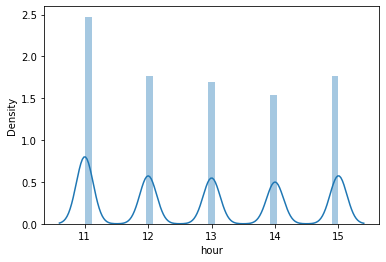

C:\Users\semam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


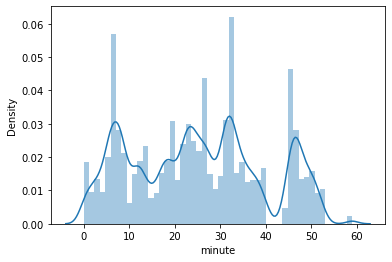

C:\Users\semam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


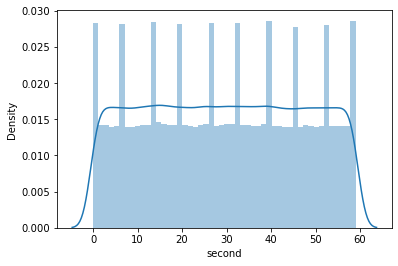

In [25]:
for i in time_columns:
    sns.distplot(clean_df[i]) 
    plt.show()

From the graphs shown upper it is seen that most measurements were made at 11 am in the middle of an hour

#### Last checks before building models

In [26]:
clean_df.shape

(164859, 11)

In [27]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164859 entries, 0 to 164858
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sequence name     164859 non-null  int32  
 1   tag ID            164859 non-null  int32  
 2   timestamp         164859 non-null  int64  
 3   tag x coordinate  164859 non-null  float64
 4   tag y coordinate  164859 non-null  float64
 5   tag z coordinate  164859 non-null  float64
 6   activity          164859 non-null  int32  
 7   hour              164859 non-null  int64  
 8   minute            164859 non-null  int64  
 9   second            164859 non-null  int64  
 10  millisecond       164859 non-null  int64  
dtypes: float64(3), int32(3), int64(5)
memory usage: 11.9 MB


In [28]:
clean_df['activity'].value_counts()

1     54480
10    32709
4     27244
7     18361
6     11779
2      6168
3      5210
0      2973
9      2848
5      1706
8      1381
Name: activity, dtype: int64

# Building models

Models to be built with all the method covered through the courses such as log reg, SVM, trees, ensemble and boosting methods.

In [65]:
#for Spliting Data
from sklearn.model_selection import train_test_split

#importing Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#to Transform Data
from sklearn import preprocessing

#statistical Tools
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [30]:
X = clean_df.drop(['activity'], axis=1) # Input Variable
y = clean_df['activity'] # Target Varibale

### Scaling

In order to be fit to the model data should be scaled with robust scaler to decrease the effect of outliers.

In [31]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x = scaler.fit_transform(X)

### Train test split

Split to train and test data is to be made 80% to train and 20% test.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape[0], x_test.shape[0])

131887 32972


Now it's time to build models and check each for efficiency

In [33]:
accuracy = {}

def build_model(model, model_name):
    print(model_name)
    
    # Fitting model
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    #Model accuracy
    acc = accuracy_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('accuracy_score', acc)
    print()
    
    # Classification Report
    print('Classification Report')
    print(classification_report(y_test, pred))

### Logistic Regression

In [34]:
lrc = LogisticRegression()

build_model(lrc, 'Logistic Regression Classifier')

Logistic Regression Classifier
accuracy_score 40.84677908528448

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       580
           1       0.40      0.79      0.53     10929
           2       0.00      0.00      0.00      1210
           3       0.32      0.19      0.24      1060
           4       0.44      0.25      0.32      5403
           5       0.00      0.00      0.00       349
           6       0.40      0.12      0.19      2376
           7       0.00      0.00      0.00      3699
           8       0.00      0.00      0.00       269
           9       0.00      0.00      0.00       587
          10       0.43      0.46      0.44      6510

    accuracy                           0.41     32972
   macro avg       0.18      0.17      0.16     32972
weighted avg       0.33      0.41      0.34     32972



C:\Users\semam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\semam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\semam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vectors

In [66]:
lsvc = LinearSVC()

build_model(lsvc, 'Linear SV Classifier')

Linear SV Classifier
accuracy_score 40.09159286667475

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       580
           1       0.40      0.86      0.55     10929
           2       0.00      0.00      0.00      1210
           3       0.33      0.05      0.08      1060
           4       0.40      0.12      0.18      5403
           5       0.00      0.00      0.00       349
           6       0.19      0.00      0.01      2376
           7       0.00      0.00      0.00      3699
           8       0.00      0.00      0.00       269
           9       0.00      0.00      0.00       587
          10       0.40      0.47      0.43      6510

    accuracy                           0.40     32972
   macro avg       0.16      0.14      0.11     32972
weighted avg       0.30      0.40      0.30     32972



C:\Users\semam\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\semam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\semam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\semam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

### Decision Tree

In [35]:
dtc = DecisionTreeClassifier()

build_model(dtc, 'Decision Tree Classifier')

Decision Tree Classifier
accuracy_score 86.7493630959602

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       580
           1       0.94      0.94      0.94     10929
           2       0.59      0.61      0.60      1210
           3       0.83      0.86      0.84      1060
           4       0.92      0.94      0.93      5403
           5       0.56      0.57      0.57       349
           6       0.94      0.96      0.95      2376
           7       0.76      0.75      0.75      3699
           8       0.61      0.65      0.63       269
           9       0.75      0.73      0.74       587
          10       0.86      0.84      0.85      6510

    accuracy                           0.87     32972
   macro avg       0.76      0.76      0.76     32972
weighted avg       0.87      0.87      0.87     32972



### Bagging classifier

In [36]:
bagg_c = BaggingClassifier() 

build_model(bagg_c, 'Bagging Classifier')

Bagging Classifier
accuracy_score 90.54652432366856

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.54      0.62       580
           1       0.93      0.98      0.96     10929
           2       0.78      0.65      0.71      1210
           3       0.90      0.88      0.89      1060
           4       0.93      0.96      0.94      5403
           5       0.77      0.52      0.62       349
           6       0.94      0.98      0.96      2376
           7       0.85      0.79      0.82      3699
           8       0.80      0.65      0.72       269
           9       0.87      0.77      0.82       587
          10       0.89      0.91      0.90      6510

    accuracy                           0.91     32972
   macro avg       0.85      0.78      0.81     32972
weighted avg       0.90      0.91      0.90     32972



### Random forest

In [37]:
rfc = RandomForestClassifier()

build_model(rfc, 'Random Forest Classifier')

Random Forest Classifier
accuracy_score 93.57636782724737

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.55      0.67       580
           1       0.95      0.99      0.97     10929
           2       0.91      0.72      0.81      1210
           3       0.94      0.93      0.94      1060
           4       0.96      0.98      0.97      5403
           5       0.91      0.55      0.69       349
           6       0.97      0.98      0.97      2376
           7       0.92      0.85      0.88      3699
           8       0.91      0.70      0.79       269
           9       0.93      0.83      0.88       587
          10       0.91      0.96      0.93      6510

    accuracy                           0.94     32972
   macro avg       0.92      0.82      0.86     32972
weighted avg       0.93      0.94      0.93     32972



### Adaptive Boosting

In [38]:
abc = AdaBoostClassifier() 

build_model(abc, 'Adaprtive Boosting Classifier')

Adaprtive Boosting Classifier
accuracy_score 40.38578187553075

Classification Report
              precision    recall  f1-score   support

           0       0.16      0.09      0.11       580
           1       0.53      0.50      0.51     10929
           2       0.10      0.21      0.13      1210
           3       0.15      0.22      0.18      1060
           4       0.49      0.51      0.50      5403
           5       0.12      0.01      0.01       349
           6       0.23      0.45      0.31      2376
           7       0.21      0.02      0.04      3699
           8       0.00      0.00      0.00       269
           9       0.16      0.14      0.15       587
          10       0.48      0.52      0.50      6510

    accuracy                           0.40     32972
   macro avg       0.24      0.24      0.22     32972
weighted avg       0.41      0.40      0.39     32972



### Gradient Boosting

In [39]:
gbc = GradientBoostingClassifier()

build_model(gbc, 'Gradient Boosting Classifier')

Gradient Boosting Classifier
accuracy_score 75.65510129807109

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.32      0.47       580
           1       0.77      0.91      0.83     10929
           2       0.86      0.31      0.45      1210
           3       0.78      0.63      0.70      1060
           4       0.79      0.79      0.79      5403
           5       0.91      0.43      0.58       349
           6       0.86      0.90      0.88      2376
           7       0.68      0.39      0.50      3699
           8       0.96      0.82      0.88       269
           9       0.88      0.61      0.72       587
          10       0.67      0.80      0.73      6510

    accuracy                           0.76     32972
   macro avg       0.82      0.63      0.69     32972
weighted avg       0.76      0.76      0.74     32972



# Conclusion

*Logistic regression* and *SVC* gave the worst results for such classification task.
While *AdaBoost* also failed giving 40% accuracy, another boosting method - *gradient boosting* - performed well giving 75% accuracy.

Tree-based methods gave the best results, that is, *decision tree, bagging* and *random forest*.

From the obtained classifiaction reports it is easy to conclude that ensemble method **random forest classifier** gives the best accuracy 90% and is the most suitable and efficient method for such a task.

## Feature importance

Now it is required to estimate importance of each feature for different models.


### Linear Regression

Text(0.5, 0, 'Relative Feature Importance')

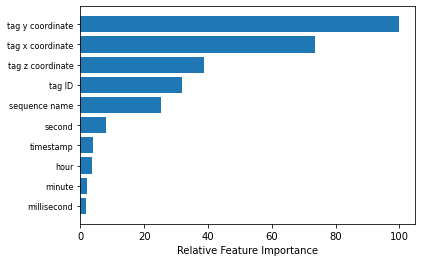

In [46]:
feature_importance = abs(lrc.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

### Support Vectors


Text(0.5, 0, 'Relative Feature Importance')

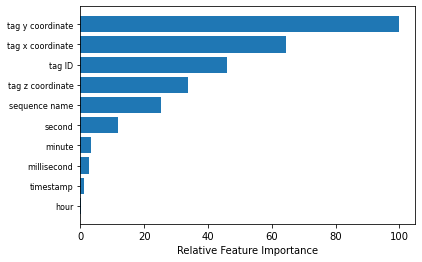

In [67]:
feature_importance = abs(lsvc.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

### Decision Tree

<AxesSubplot:>

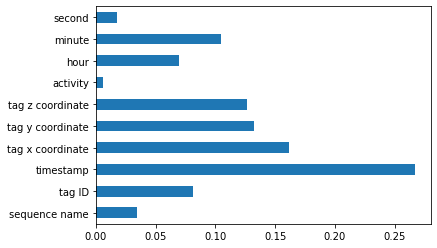

In [74]:
feat_importances = pd.Series(dtc.feature_importances_, index=clean_df.columns[:-1])
feat_importances.plot(kind='barh')

### Bagging

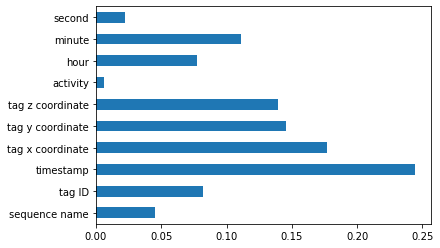

In [62]:
for i in bagg_c.estimators_:
    feat_importances = pd.Series(i.feature_importances_, index=clean_df.columns[:-1])
    feat_importances.plot(kind='barh')

### Random Forest

<AxesSubplot:>

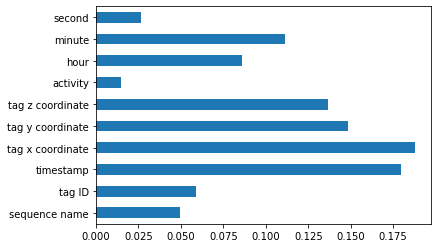

In [57]:
feat_importances = pd.Series(rfc.feature_importances_, index=clean_df.columns[:-1])
feat_importances.plot(kind='barh')

### Adaptive Boosting

<AxesSubplot:>

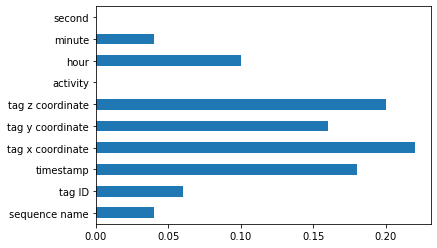

In [63]:
feat_importances = pd.Series(abc.feature_importances_, index=clean_df.columns[:-1])
feat_importances.plot(kind='barh')

### Gradient Boosting

<AxesSubplot:>

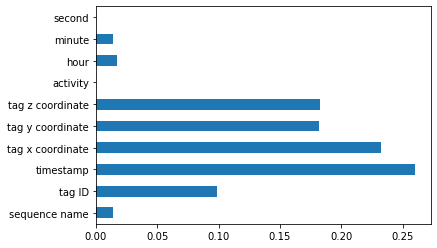

In [64]:
feat_importances = pd.Series(gbc.feature_importances_, index=clean_df.columns[:-1])
feat_importances.plot(kind='barh')

From the obtained graphs it is seen that for the most model the most efficient features were timestamp and 'x' coordinate. Except for Logistic Regression and Linear SVC. For these models ccordinate 'y' was the most imporatant and slightly less important was 'x' coordinate.

# What was added? 

+ Some markdown commentaries to make the code more understandable
+ New models were added (Logistic Regression and LinearSVC)
+ Feature importance was added to better understand performance of each model

### Tried but didn't succeed

+ over-sampling the dataset with SMOTE
+ Fixing proper hyperparameters to models

Setting hyperparameters lowered the performance of the models while oversampling made models' performance way better, but they were getting to 'big' and impossible for the computer to calculate in reasonable amount of time.